In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('./data/FPT.csv')
print(df.head())
print(df.info())

  Ticker        Date/Time   Open   High    Low  Close  Volume  Open Interest
0    FPT  12/25/2018 9:15  30.89  30.89  30.89  30.89   35410              0
1    FPT  12/25/2018 9:16  30.81  30.81  30.81  30.81     190              0
2    FPT  12/25/2018 9:17  30.74  30.81  30.74  30.74    1120              0
3    FPT  12/25/2018 9:18  30.74  30.74  30.74  30.74    2120              0
4    FPT  12/25/2018 9:19  30.74  30.74  30.74  30.74   22500              0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Date/Time      97406 non-null  object 
 2   Open           97406 non-null  float64
 3   High           97406 non-null  float64
 4   Low            97406 non-null  float64
 5   Close          97406 non-null  float64
 6   Volume         97406 non-null  int64  
 7   Open Interest  97406 non-null

In [55]:
# chuyen du lieu thanh datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df = df.drop(columns=['Open Interest'])
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     97406 non-null  object        
 1   Date/Time  97406 non-null  datetime64[ns]
 2   Open       97406 non-null  float64       
 3   High       97406 non-null  float64       
 4   Low        97406 non-null  float64       
 5   Close      97406 non-null  float64       
 6   Volume     97406 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 5.2+ MB
None
  Ticker           Date/Time   Open   High    Low  Close  Volume
0    FPT 2018-12-25 09:15:00  30.89  30.89  30.89  30.89   35410
1    FPT 2018-12-25 09:16:00  30.81  30.81  30.81  30.81     190
2    FPT 2018-12-25 09:17:00  30.74  30.81  30.74  30.74    1120
3    FPT 2018-12-25 09:18:00  30.74  30.74  30.74  30.74    2120
4    FPT 2018-12-25 09:19:00  30.74  30.74  30.74  30.74  

In [56]:
# Tính khoảng cách thời gian giữa các dòng liên tiếp (tính bằng giây)
time_diffs = df['Date/Time'].diff().dt.total_seconds()

# Chuyển đổi từ giây sang phút (chia cho 60)
time_diffs_minutes = time_diffs / 60

# Tính trung bình khoảng cách (loại bỏ NaN ở dòng đầu tiên)
average_time_diff = time_diffs_minutes.dropna().mean()

max_time_diff = time_diffs_minutes.dropna().max()

min_time_diff = time_diffs_minutes.dropna().min()

# In kết quả
print(f'Trung bình khoảng cách thời gian giữa các dòng: {average_time_diff:.2f} phút')

print(f'Max khoảng cách thời gian giữa các dòng: {max_time_diff:.2f} phút')

print(f'Min khoảng cách thời gian giữa các dòng: {min_time_diff:.2f} phút')


Trung bình khoảng cách thời gian giữa các dòng: 10.77 phút
Max khoảng cách thời gian giữa các dòng: 14069.00 phút
Min khoảng cách thời gian giữa các dòng: 1.00 phút


In [57]:
df.set_index('Date/Time', inplace=True)

# Tổng hợp theo ngày
df_daily = df.resample('1D').last()
df_daily['Price_Change'] = df_daily['Close'].shift(-1) - df_daily['Close']
df_daily = df_daily.dropna()

df_daily.head()

,Ticker,Open,High,Low,Close,Volume,Price_Change
Date/Time,,,,,,,
2018-12-25,FPT,30.66,30.74,30.59,30.66,16480.0,0.23
2018-12-26,FPT,30.89,30.89,30.89,30.89,23190.0,0.30
2018-12-27,FPT,31.19,31.19,31.19,31.19,38230.0,0.30
2019-01-02,FPT,30.74,30.74,30.74,30.74,64860.0,-0.30
2019-01-03,FPT,30.44,30.44,30.44,30.44,27490.0,0.22


In [58]:
date_diffs = df_daily.index.to_series().diff().dt.days.dropna()  # Tính khoảng cách ngày
avg_gap = date_diffs.mean()  # Trung bình khoảng cách
print("Trung bình khoảng cách giữa các ngày có dữ liệu:", avg_gap, "ngày")

Trung bình khoảng cách giữa các ngày có dữ liệu: 1.8593350383631713 ngày


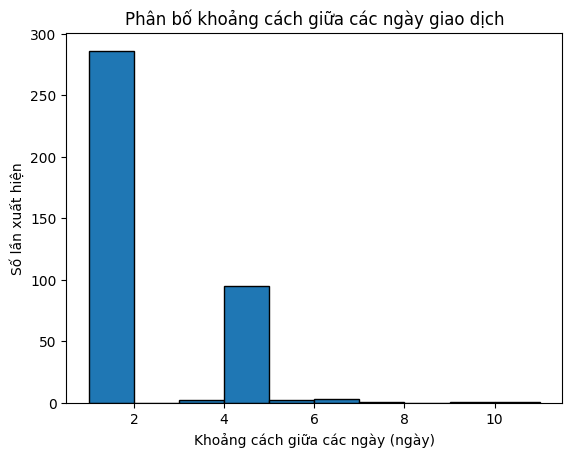

In [ ]:

plt.hist(date_diffs, bins=10, edgecolor='black')
plt.xlabel('Khoảng cách giữa các ngày (ngày)')
plt.ylabel('Số lần xuất hiện')
plt.title('Phân bố khoảng cách giữa các ngày giao dịch')
plt.show()

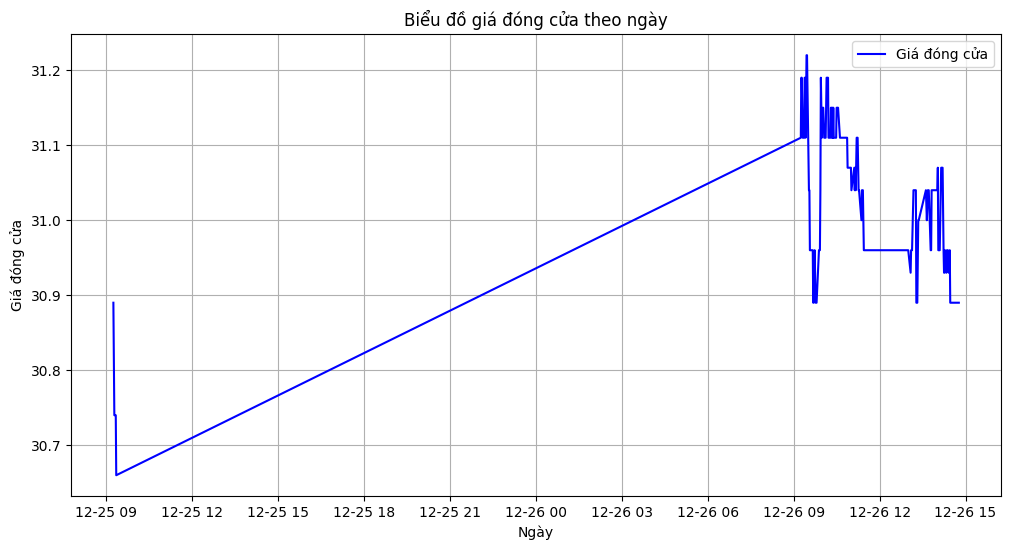

In [65]:
start_date = '2018-12-25'
end_date = '2018-12-26'
df_filtered  = df.loc[start_date:end_date]

plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Close'], linestyle='-', color='b', label='Giá đóng cửa')

# Định dạng biểu đồ
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa theo ngày')
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()